In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fakenewsnet/PolitiFactNews.txt
/kaggle/input/fakenewsnet/PolitiFactUser.txt
/kaggle/input/fakenewsnet/BuzzFeedNews.txt
/kaggle/input/fakenewsnet/PolitiFact_real_news_content.csv
/kaggle/input/fakenewsnet/PolitiFact_fake_news_content.csv
/kaggle/input/fakenewsnet/BuzzFeed_real_news_content.csv
/kaggle/input/fakenewsnet/BuzzFeedUserFeature.mat
/kaggle/input/fakenewsnet/BuzzFeedNewsUser.txt
/kaggle/input/fakenewsnet/BuzzFeedUser.txt
/kaggle/input/fakenewsnet/PolitiFactUserUser.txt
/kaggle/input/fakenewsnet/BuzzFeedUserUser.txt
/kaggle/input/fakenewsnet/BuzzFeed_fake_news_content.csv
/kaggle/input/fakenewsnet/PolitiFactUserFeature.mat
/kaggle/input/fakenewsnet/PolitiFactNewsUser.txt


In [3]:
# import scipy.io as sio
# import numpy as np
# import matplotlib.pyplot as plt

# # Load the .mat file
# try:
#     mat_contents = sio.loadmat('/kaggle/input/fakenewsnet/BuzzFeedUserFeature.mat') # Use your correct path
#     user_features_coo = mat_contents['X'] # This is in COO format

#     # Convert to CSR format for easier slicing and row operations
#     user_features_csr = user_features_coo.tocsr()
#     print(f"Type of user_features_csr: {type(user_features_csr)}")
#     print(f"Shape of user_features_csr: {user_features_csr.shape}")

# except FileNotFoundError:
#     print("MAT file not found. Please check the path.")
#     user_features_csr = None # Placeholder
# except Exception as e:
#     print(f"Error loading or converting MAT file: {e}")
#     user_features_csr = None # Placeholder


# if user_features_csr is not None:
#     # 1. Examine a Small Slice (Convert to Dense Array for Viewing)
#     try:
#         # Slice the CSR matrix first, then convert the smaller slice to dense
#         small_slice_sparse = user_features_csr[:5, :10]
#         small_slice_dense = small_slice_sparse.toarray()
#         print("\nDense view of the first 5 users and first 10 features:")
#         print(small_slice_dense)
#     except Exception as e:
#         print(f"\nError converting slice to dense array: {e}")

#     # 2. Look at all features for one user (one row)
#     try:
#         user_index = 0 # For the first user
#         user_0_sparse_row = user_features_csr.getrow(user_index) # getrow works well with CSR

#         # To see its content (non-zero elements)
#         non_zero_indices_user_0 = user_0_sparse_row.indices # Column indices of non-zero elements
#         non_zero_values_user_0 = user_0_sparse_row.data   # The non-zero data

#         print(f"\nNumber of non-zero features for user {user_index}: {len(non_zero_indices_user_0)}")
#         if len(non_zero_indices_user_0) > 0:
#             print(f"First 10 non-zero feature column indices for user {user_index}: {non_zero_indices_user_0[:10]}")
#             print(f"Corresponding values for these features: {non_zero_values_user_0[:10]}")

#         # If you really need the full row as a dense array (can be very large if num_columns is huge)
#         # user_0_features_dense = user_0_sparse_row.toarray()
#         # print(f"\nAll features for user {user_index} - Dense (shape: {user_0_features_dense.shape}):")
#         # print(user_0_features_dense) # Be cautious printing this if it's too wide
#     except Exception as e:
#         print(f"\nError processing features for user {user_index}: {e}")

#     # The rest of your analysis code (sparsity, summary stats of .data, getnnz)
#     # should generally work fine once you have the matrix loaded.
#     # For example, user_features_csr.data will give you all non-zero values.

#     # --- Calculate Sparsity (works with CSR too) ---
#     sparsity = 1.0 - (user_features_csr.nnz / (user_features_csr.shape[0] * user_features_csr.shape[1]))
#     print(f"\nSparsity of the CSR matrix: {sparsity*100:.4f}%")

#     # --- Summary Statistics of Non-Zero Values ---
#     if user_features_csr.nnz > 0:
#         print("\nSummary statistics of the stored (non-zero) feature values:")
#         print(f"  Min value: {user_features_csr.data.min()}")
#         print(f"  Max value: {user_features_csr.data.max()}")
#         print(f"  Mean value: {user_features_csr.data.mean()}")
#         print(f"  Std value: {user_features_csr.data.std()}")

#         plt.figure(figsize=(10, 6))
#         plt.hist(user_features_csr.data, bins=50, log=True)
#         plt.title('Distribution of Non-Zero User Feature Values')
#         plt.xlabel('Feature Value')
#         plt.ylabel('Frequency (log scale)')
#         plt.show()
#     else:
#         print("\nMatrix contains no non-zero elements to analyze.")

#     # --- Examine Row and Column Sums (Activity of Users and Features) ---
#     num_features_per_user = user_features_csr.getnnz(axis=1)
#     print(f"\nNumber of non-zero features for the first 10 users: {num_features_per_user[:10]}")

#     plt.figure(figsize=(10, 6))
#     plt.hist(num_features_per_user, bins=50, log=True)
#     plt.title('Distribution of Number of Non-Zero Features per User')
#     plt.xlabel('Number of Non-Zero Features')
#     plt.ylabel('Number of Users (log scale)')
#     plt.show()

#     num_users_per_feature = user_features_csr.getnnz(axis=0)
#     print(f"\nNumber of users for whom the first 10 features are non-zero: {num_users_per_feature[:10]}")

#     plt.figure(figsize=(10, 6))
#     plt.hist(num_users_per_feature, bins=50, log=True)
#     plt.title('Distribution of Number of Users per Feature')
#     plt.xlabel('Number of Users a Feature Appears In')
#     plt.ylabel('Number of Features (log scale)')
#     plt.show()

# else:
#     print("user_features_csr is None. Cannot perform analysis.")

In [4]:
pip install textstat --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 3.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 19.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 48.1 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


--- 1. Loading Data ---
Content CSVs loaded successfully.
Combined news_df shape: (182, 13)
Loaded 182 news ID mappings from BuzzFeedNews.txt.
Loaded 15257 user ID mappings from BuzzFeedUser.txt.
Loaded 22779 news-user interactions from BuzzFeedNewsUser.txt.
Loaded 634750 user-user relationships from BuzzFeedUserUser.txt.

--- 2. Data Cleaning and Preparation ---
Original news_df info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              182 non-null    object
 1   title           182 non-null    object
 2   text            182 non-null    object
 3   url             174 non-null    object
 4   top_img         172 non-null    object
 5   authors         141 non-null    object
 6   source          174 non-null    object
 7   publish_date    133 non-null    object
 8   movies          25 non-null     object
 9   images          1


Missing values summary:
                            Missing Count  Percentage (%)
movies                               157       86.263736
meta_article_fb_publisher            134       73.626374
meta_author                          132       72.527473
meta_generator                       132       72.527473
meta_twitter_site                    100       54.945055
meta_twitter_card                     60       32.967033
publish_month                         49       26.923077
publish_dayofweek                     49       26.923077
publish_year                          49       26.923077
publish_datetime                      49       26.923077
publish_date                          49       26.923077
authors                               41       22.527473
canonical_link                        12        6.593407
top_img                               10        5.494505
meta_publisher                        10        5.494505
images                                10        5.494505
meta_

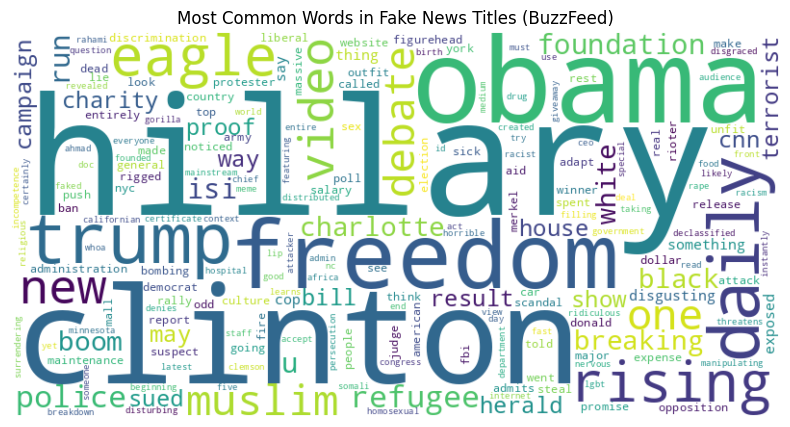

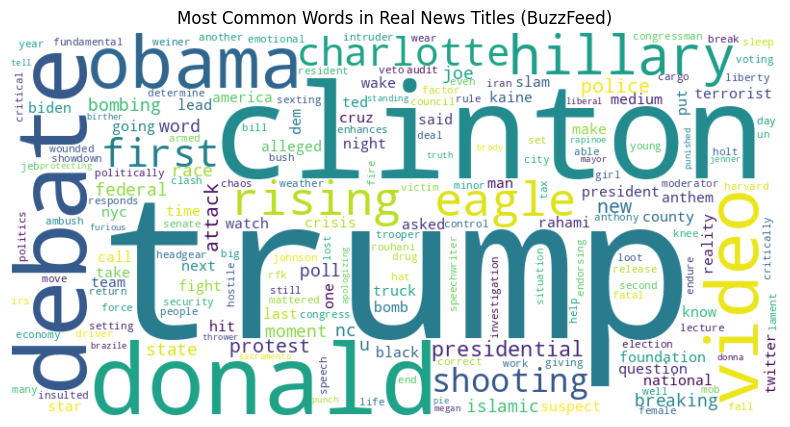


Top 20 words in Fake News Titles: [('hillary', 23), ('clinton', 15), ('obama', 13), ('freedom', 13), ('trump', 12), ('daily', 12), ('eagle', 11), ('rising', 11), ('video', 8), ('new', 7), ('one', 6), ('muslim', 6), ('debate', 6), ('refugee', 5), ('police', 5), ('foundation', 4), ('run', 4), ('isi', 4), ('u', 4), ('breaking', 4)]
Top 20 words in Real News Titles: [('trump', 37), ('clinton', 12), ('donald', 11), ('debate', 11), ('obama', 9), ('video', 9), ('hillary', 8), ('eagle', 6), ('rising', 6), ('charlotte', 5), ('first', 5), ('shooting', 5), ('presidential', 5), ('attack', 4), ('protest', 4), ('police', 4), ('nc', 3), ('moment', 3), ('federal', 3), ('breaking', 3)]



--- 4.1 Sentiment Analysis ---
Added sentiment scores for titles.
Added sentiment scores for text body.



--- 5. Source, Author, and Extracted MetaData Analysis ---

Top 10 Most Trustworthy Sources (Highest Proportion of Real News, min 5 articles):
                                final_source  proportion_fake  article_count  \
1                                   ABC News         0.000000              9   
4                                        CNN         0.000000             22   
18                                  POLITICO         0.000000             27   
19                         POLITICO Magazine         0.000000              5   
2   Addicting Info | The Knowledge You Crave         0.500000             10   
10                              Eagle Rising         0.611111             18   
15             John Hawkins' Right Wing News         0.708333             24   
16                          Occupy Democrats         0.857143              7   
11                             Freedom Daily         0.941176             17   
27                                       nan         1.0


Top Authors by Proportion of Fake News (min 3 articles):
                              authors_clean  proportion_fake  article_count  \
7                           tiffiny ruegner         1.000000              3   
8                            view all posts         1.000000              3   
1  grant stern,brett bose,natalie dickinson         0.800000              5   
6                   terresa monroe-hamilton         0.750000              8   
0                               cassy fiano         0.666667              6   
5                             sierra marlee         0.600000              5   
4              philip hodges,view all posts         0.400000              5   
2                  jack shafer,louis nelson         0.000000              5   
3                       jack shafer,nolan d         0.000000              4   

   proportion_real  
7         0.000000  
8         0.000000  
1         0.200000  
6         0.250000  
0         0.333333  
5         0.400000  
4   


--- EDA for meta_author ---



--- EDA for meta_og_type ---



--- EDA for meta_twitter_site ---



--- EDA for meta_twitter_card ---



--- EDA for meta_article_fb_publisher ---



--- 6. Temporal Analysis ---


/tmp/ipykernel_35/541140911.py:486: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.




--- 7. Multimedia Analysis (Basic) ---



--- 8. Engagement & Basic Network EDA ---



--- EDA Complete ---

Final Enriched DataFrame for Modeling (news_df_eda) - Sample:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         182 non-null    object        
 1   title                      182 non-null    object        
 2   text                       182 non-null    object        
 3   url                        174 non-null    object        
 4   top_img                    172 non-null    object        
 5   authors                    141 non-null    object        
 6   source                     174 non-null    object        
 7   publish_date               133 non-null    object        
 8   movies                     25 non-null     object        
 9   images                     172 non-null    object        
 10  canonical_link             170 non-null    object

In [6]:
import pandas as pd
import numpy as np
import json # For parsing stringified JSON in meta_data
from urllib.parse import urlparse # For extracting domain from URL if 'source' column is not direct
from datetime import datetime
import ast # For safely evaluating string literals as Python expressions

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px

# NLP and Text Analysis
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from collections import Counter
import textstat # For readability scores (pip install textstat)
from nltk.sentiment.vader import SentimentIntensityAnalyzer # For sentiment analysis

# Download necessary NLTK resources (if not already downloaded)
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords', quiet=True)
try:
    word_tokenize("test")
except LookupError:
    nltk.download('punkt', quiet=True)
try:
    WordNetLemmatizer().lemmatize("cats")
except LookupError:
    nltk.download('wordnet', quiet=True)
try:
    nltk.pos_tag(["test"])
except LookupError:
    nltk.download('averaged_perceptron_tagger', quiet=True)
try:
    analyzer = SentimentIntensityAnalyzer()
    analyzer.polarity_scores("test")
except LookupError:
    nltk.download('vader_lexicon', quiet=True)


# --- 1. Data Loading and Initial Merging ---
print("--- 1. Loading Data ---")

# Define file paths (adjust if your Kaggle input directory is different)
base_path = '/kaggle/input/fakenewsnet/' # Common path in Kaggle for datasets named 'fakenewsnet'
# If your dataset folder within fakenewsnet is also called 'fakenewsnet', then:
# base_path = '/kaggle/input/fakenewsnet/fakenewsnet/' # Or whatever the subfolder is

try:
    fake_content_df = pd.read_csv(f'{base_path}BuzzFeed_fake_news_content.csv')
    real_content_df = pd.read_csv(f'{base_path}BuzzFeed_real_news_content.csv')
    print("Content CSVs loaded successfully.")

    # Add label and combine
    fake_content_df['label'] = 1 # 1 for fake
    real_content_df['label'] = 0 # 0 for real
    news_df = pd.concat([real_content_df, fake_content_df], ignore_index=True)
    print(f"Combined news_df shape: {news_df.shape}")

    # --- Load Mapping and Interaction Files ---
    news_idx_to_string_id_map = {}
    with open(f'{base_path}BuzzFeedNews.txt', 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            news_idx_to_string_id_map[i + 1] = line.strip() # Assuming 1-based index from description
    string_id_to_news_idx_map = {v: k for k, v in news_idx_to_string_id_map.items()}
    print(f"Loaded {len(news_idx_to_string_id_map)} news ID mappings from BuzzFeedNews.txt.")

    user_idx_to_hash_map = {}
    with open(f'{base_path}BuzzFeedUser.txt', 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            user_idx_to_hash_map[i + 1] = line.strip()
    print(f"Loaded {len(user_idx_to_hash_map)} user ID mappings from BuzzFeedUser.txt.")

    news_user_interactions = []
    with open(f'{base_path}BuzzFeedNewsUser.txt', 'r', encoding='utf-8') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) == 3:
                news_user_interactions.append({
                    'numerical_news_id': int(parts[0]),
                    'numerical_user_id': int(parts[1]),
                    'times_spread': int(parts[2])
                })
    news_user_df = pd.DataFrame(news_user_interactions)
    print(f"Loaded {len(news_user_df)} news-user interactions from BuzzFeedNewsUser.txt.")

    user_user_relations = []
    with open(f'{base_path}BuzzFeedUserUser.txt', 'r', encoding='utf-8') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) == 2:
                user_user_relations.append({
                    'follower_id_idx': int(parts[0]),
                    'following_id_idx': int(parts[1])
                })
    user_user_df = pd.DataFrame(user_user_relations)
    print(f"Loaded {len(user_user_df)} user-user relationships from BuzzFeedUserUser.txt.")

except FileNotFoundError as e:
    print(f"ERROR: File not found. Please check paths. Details: {e}")
    print(f"Attempted base path: {base_path}")
    news_df = pd.DataFrame(columns=['id', 'title', 'text', 'url', 'top_img', 'authors', 'source', 'publish_date', 'movies', 'images', 'canonical_link', 'meta_data', 'label'])
    news_user_df = pd.DataFrame()
    user_user_df = pd.DataFrame()
    string_id_to_news_idx_map = {}
except Exception as e:
    print(f"An error occurred during data loading: {e}")
    news_df = pd.DataFrame(columns=['id', 'title', 'text', 'url', 'top_img', 'authors', 'source', 'publish_date', 'movies', 'images', 'canonical_link', 'meta_data', 'label'])
    news_user_df = pd.DataFrame()
    user_user_df = pd.DataFrame()
    string_id_to_news_idx_map = {}


# --- 2. Data Cleaning and Preparation ---
print("\n--- 2. Data Cleaning and Preparation ---")
if not news_df.empty:
    print("Original news_df info:")
    news_df.info()
    # print(news_df.head()) # Keep head print for later after more processing

    # Handle missing text/titles and duplicates
    news_df.dropna(subset=['id', 'title', 'text'], inplace=True)
    news_df.drop_duplicates(subset=['id'], inplace=True) # 'id' is the string ID from CSV

    # --- DEBUGGING ID MAPPING SECTION ---
    if string_id_to_news_idx_map and not news_df.empty and 'id' in news_df.columns:
        print("\n--- DEBUGGING ID MAPPING ---")
        print("Sample keys from string_id_to_news_idx_map (these are IDs from BuzzFeedNews.txt):")
        map_keys_sample = list(string_id_to_news_idx_map.keys())
        for i in range(min(5, len(map_keys_sample))):
            key = map_keys_sample[i]
            print(f"  '{key}' -> {string_id_to_news_idx_map[key]}")

        print("\nSample unique values from news_df['id'] (these are IDs from the CSV files):")
        csv_ids_sample = news_df['id'].unique()
        print(csv_ids_sample[:min(5, len(csv_ids_sample))])

        # Example of a potential mismatch check with the first CSV ID
        if len(csv_ids_sample) > 0:
            sample_csv_id = csv_ids_sample[0]
            print(f"\nChecking if sample CSV ID '{sample_csv_id}' exists AS IS in string_id_to_news_idx_map: {sample_csv_id in string_id_to_news_idx_map}")

            # Attempt to find a similar key if direct match fails (example heuristic)
            if isinstance(sample_csv_id, str):
                parts_of_csv_id = sample_csv_id.replace('-', '_').split('_')
                potential_matches = 0
                for map_key in map_keys_sample[:1000]: 
                    if any(part in map_key for part in parts_of_csv_id if len(part) > 2):
                        potential_matches +=1
                if potential_matches > 0:
                     print(f"Found {potential_matches} map keys (out of first 1000 checked) with some overlapping parts with '{sample_csv_id}'. This indicates IDs are different but might be related.")
        print("--- END DEBUGGING ---")
    # --- END DEBUGGING ID MAPPING SECTION ---


    # Map string 'id' from CSV to numerical_news_id
    if string_id_to_news_idx_map and 'id' in news_df.columns:
        # Transformation based on observed mismatch:
        # CSV ID: 'Real_1-Webpage' or 'Fake_10-Webpage'
        # TXT ID: 'BuzzFeed_Real_1' or 'BuzzFeed_Fake_10'
        def transform_csv_id_for_mapping(csv_id):
            if pd.isna(csv_id) or not isinstance(csv_id, str):
                return None
            # Remove "-Webpage" suffix
            transformed_id = csv_id.replace("-Webpage", "")
            # Prepend "BuzzFeed_"
            transformed_id = "BuzzFeed_" + transformed_id
            return transformed_id

        news_df['id_for_mapping'] = news_df['id'].apply(transform_csv_id_for_mapping)
        news_df['numerical_news_id'] = news_df['id_for_mapping'].map(string_id_to_news_idx_map)
        
        print(f"\nSample of transformed IDs for mapping: {news_df['id_for_mapping'].head().tolist()}")
        print(f"Successfully mapped {news_df['numerical_news_id'].notna().sum()} news articles to numerical IDs after transformation.")
        
        if news_df['numerical_news_id'].notna().sum() == 0 and len(news_df) > 0:
            print("WARNING: Mapping still resulted in 0 successful matches. Please re-check the transformation logic and ID formats carefully.")
            print("Example transformed ID from CSV:", news_df['id_for_mapping'].iloc[0] if not news_df.empty else "N/A")
            print("Example key from map:", list(string_id_to_news_idx_map.keys())[0] if string_id_to_news_idx_map else "N/A")


        news_df['numerical_news_id'] = news_df['numerical_news_id'].astype('Int64') # Use nullable integer
    else:
        print("Warning: string_id_to_news_idx_map is empty or 'id' column missing. Cannot map news IDs.")
        news_df['numerical_news_id'] = pd.NA


    # Parse 'publish_date'
    def parse_publish_date(date_str):
        if pd.isna(date_str): return None
        try:
            if isinstance(date_str, str):
                try:
                    date_dict = ast.literal_eval(date_str)
                    timestamp_ms = date_dict.get('$date') if isinstance(date_dict, dict) else int(date_str)
                except (ValueError, SyntaxError): timestamp_ms = int(date_str)
            elif isinstance(date_str, (int, float)): timestamp_ms = int(date_str)
            else: return None
            return pd.to_datetime(timestamp_ms, unit='ms', errors='coerce')
        except: return None

    if 'publish_date' in news_df.columns:
        news_df['publish_datetime'] = news_df['publish_date'].apply(parse_publish_date)
        news_df['publish_year'] = news_df['publish_datetime'].dt.year.astype('Int64')
        news_df['publish_month'] = news_df['publish_datetime'].dt.month.astype('Int64')
        news_df['publish_dayofweek'] = news_df['publish_datetime'].dt.dayofweek.astype('Int64')
        print("\nParsed publish_date.")

    # Clean 'source' (often a URL, extract domain)
    if 'source' in news_df.columns:
        news_df['domain_source'] = news_df['source'].astype(str).apply(lambda x: urlparse(x).netloc.replace('www.','') if pd.notna(x) and 'http' in x else x)
        print("\nCleaned 'source' into 'domain_source'.")

    # Enhanced 'meta_data' Parsing
    def parse_meta_data_column(meta_str):
        parsed_meta = {
            'meta_publisher': None, 'meta_description_len': 0, 'meta_generator': None,
            'meta_author': None, 'meta_og_type': None, 'meta_twitter_site': None,
            'meta_twitter_card': None, 'meta_fb_app_id_present': False,
            'meta_article_fb_publisher': None, 'meta_num_keywords': 0,
            'meta_has_viewport': False
        }
        if pd.isna(meta_str): return pd.Series(parsed_meta)
        try:
            meta_dict = json.loads(meta_str) # Primary method: direct JSON
        except (json.JSONDecodeError, TypeError):
            try:
                meta_dict = ast.literal_eval(meta_str) # Fallback: Python dict-like string
                if not isinstance(meta_dict, dict): meta_dict = {}
            except:
                meta_dict = {} # Could not parse

        parsed_meta['meta_publisher'] = meta_dict.get('publisher') or meta_dict.get('og', {}).get('site_name')
        parsed_meta['meta_description_len'] = len(meta_dict.get('description', ''))
        parsed_meta['meta_generator'] = meta_dict.get('generator')
        parsed_meta['meta_author'] = meta_dict.get('author') # Author from meta_data
        parsed_meta['meta_og_type'] = meta_dict.get('og', {}).get('type')
        parsed_meta['meta_twitter_site'] = meta_dict.get('twitter', {}).get('site')
        parsed_meta['meta_twitter_card'] = meta_dict.get('twitter', {}).get('card')
        parsed_meta['meta_fb_app_id_present'] = pd.notna(meta_dict.get('fb', {}).get('app_id'))
        parsed_meta['meta_article_fb_publisher'] = meta_dict.get('article', {}).get('publisher')

        keywords_str = meta_dict.get('keywords', '')
        if isinstance(keywords_str, str) and keywords_str:
            parsed_meta['meta_num_keywords'] = len(keywords_str.split(','))
        elif isinstance(keywords_str, list): # If it's already a list
             parsed_meta['meta_num_keywords'] = len(keywords_str)

        parsed_meta['meta_has_viewport'] = pd.notna(meta_dict.get('viewport'))
        return pd.Series(parsed_meta)

    if 'meta_data' in news_df.columns:
        meta_extracted_df = news_df['meta_data'].apply(parse_meta_data_column)
        news_df = pd.concat([news_df, meta_extracted_df], axis=1)
        print("\nExtracted detailed fields from 'meta_data'.")

    # Consolidate source information
    if 'meta_publisher' in news_df.columns and 'domain_source' in news_df.columns:
        news_df['final_source'] = news_df['meta_publisher'].fillna(news_df['domain_source'])
    elif 'meta_publisher' in news_df.columns:
        news_df['final_source'] = news_df['meta_publisher']
    elif 'domain_source' in news_df.columns:
        news_df['final_source'] = news_df['domain_source']
    else:
        news_df['final_source'] = None
    
    print("\nFinal news_df info after initial cleaning & feature engineering from CSV:")
    news_df.info()
    print(news_df.head())


# --- 3. Basic EDA ---
print("\n--- 3. Basic EDA ---")
if not news_df.empty:
    # Label distribution
    print("\nDistribution of Labels (0=Real, 1=Fake):")
    label_counts = news_df['label'].value_counts(normalize=True) * 100
    print(label_counts)
    if not label_counts.empty:
      fig = px.bar(label_counts, x=label_counts.index, y=label_counts.values,
                  labels={'index':'Label', 'y':'Percentage'}, title='Distribution of Real vs. Fake News (BuzzFeed)',
                  text_auto=True)
      fig.update_layout(xaxis = dict(tickmode = 'array', tickvals = [0, 1], ticktext = ['Real', 'Fake']))
      fig.show()

    # Missing values overview
    missing_values = news_df.isnull().sum()
    missing_percentage = (missing_values / len(news_df)) * 100
    missing_df = pd.DataFrame({'Missing Count': missing_values, 'Percentage (%)': missing_percentage})
    print("\nMissing values summary:\n", missing_df[missing_df['Missing Count'] > 0].sort_values(by='Percentage (%)', ascending=False))

# --- 4. Text-Based EDA ---
print("\n--- 4. Text-Based EDA ---")
if not news_df.empty and 'text' in news_df.columns and 'title' in news_df.columns:
    stop_words_set = set(stopwords.words('english')) # Renamed to avoid conflict
    lemmatizer = WordNetLemmatizer()
    analyzer = SentimentIntensityAnalyzer() # Initialize VADER

    def preprocess_for_wordcloud(text_series):
        corpus = []
        for text_item in text_series.astype(str): # Ensure string type
            if pd.isna(text_item): continue
            tokens = word_tokenize(text_item.lower())
            words = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words_set]
            corpus.extend(words)
        return corpus

    def plot_wordcloud(word_list, title_text): # Renamed variable
        if not word_list:
            print(f"No words to plot for {title_text}")
            return
        try:
            wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(" ".join(word_list))
            plt.figure(figsize=(10, 5))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis("off")
            plt.title(title_text) # Use renamed variable
            plt.show()
        except Exception as e:
            print(f"Error generating wordcloud for {title_text}: {e}")


    fake_title_words = preprocess_for_wordcloud(news_df[news_df['label'] == 1]['title'])
    real_title_words = preprocess_for_wordcloud(news_df[news_df['label'] == 0]['title'])
    plot_wordcloud(fake_title_words, 'Most Common Words in Fake News Titles (BuzzFeed)')
    plot_wordcloud(real_title_words, 'Most Common Words in Real News Titles (BuzzFeed)')

    def get_top_n_words(corpus, n=20):
        if not corpus: return []
        return Counter(corpus).most_common(n)

    print("\nTop 20 words in Fake News Titles:", get_top_n_words(fake_title_words))
    print("Top 20 words in Real News Titles:", get_top_n_words(real_title_words))

    news_df['title_char_len'] = news_df['title'].astype(str).apply(len)
    news_df['text_char_len'] = news_df['text'].astype(str).apply(len)
    news_df['title_word_count'] = news_df['title'].astype(str).apply(lambda x: len(word_tokenize(x)) if pd.notna(x) else 0)
    news_df['text_word_count'] = news_df['text'].astype(str).apply(lambda x: len(word_tokenize(x)) if pd.notna(x) else 0)

    for col_prefix in ['title', 'text']:
        for metric in ['char_len', 'word_count']:
            col_name = f'{col_prefix}_{metric}'
            if col_name in news_df.columns and news_df[col_name].notna().sum() > 1:
                fig = px.box(news_df, x='label', y=col_name, title=f'{metric.replace("_"," ").title()} of {col_prefix.capitalize()} by Label')
                fig.update_layout(xaxis = dict(tickmode = 'array', tickvals = [0, 1], ticktext = ['Real', 'Fake']))
                fig.show()

    if 'text' in news_df.columns and news_df['text'].notna().sum() > 1:
        news_df['readability_fkgl'] = news_df['text'].astype(str).apply(lambda x: textstat.flesch_kincaid_grade(x) if pd.notna(x) else np.nan)
        fig = px.box(news_df.dropna(subset=['readability_fkgl']), x='label', y='readability_fkgl', title='Readability (Flesch-Kincaid Grade) by Label')
        fig.update_layout(xaxis = dict(tickmode = 'array', tickvals = [0, 1], ticktext = ['Real', 'Fake']))
        fig.show()

    news_df['title_num_qmarks'] = news_df['title'].astype(str).str.count(r'\?')
    news_df['title_num_emarks'] = news_df['title'].astype(str).str.count(r'!')
    for punc_col in ['title_num_qmarks', 'title_num_emarks']:
         if news_df[punc_col].notna().sum() > 1:
            fig = px.violin(news_df, x='label', y=punc_col, title=f'{punc_col.replace("title_num_","").capitalize()} in Title by Label', box=True, points="all")
            fig.update_layout(xaxis = dict(tickmode = 'array', tickvals = [0, 1], ticktext = ['Real', 'Fake']))
            fig.show()

    # --- Sentiment Analysis ---
    print("\n--- 4.1 Sentiment Analysis ---")
    def get_sentiment_scores(text):
        if pd.isna(text):
            return pd.Series({'sentiment_neg': np.nan, 'sentiment_neu': np.nan, 'sentiment_pos': np.nan, 'sentiment_compound': np.nan})
        scores = analyzer.polarity_scores(str(text))
        return pd.Series({
            'sentiment_neg': scores['neg'],
            'sentiment_neu': scores['neu'],
            'sentiment_pos': scores['pos'],
            'sentiment_compound': scores['compound']
        })

    if 'title' in news_df.columns:
        title_sentiments = news_df['title'].apply(get_sentiment_scores)
        title_sentiments.columns = [f'title_{col}' for col in title_sentiments.columns]
        news_df = pd.concat([news_df, title_sentiments], axis=1)
        print("Added sentiment scores for titles.")

    if 'text' in news_df.columns:
        # For performance on large text, consider applying to a sample or a summary
        # For now, applying to full text (might be slow)
        text_sentiments = news_df['text'].apply(get_sentiment_scores)
        text_sentiments.columns = [f'text_{col}' for col in text_sentiments.columns]
        news_df = pd.concat([news_df, text_sentiments], axis=1)
        print("Added sentiment scores for text body.")

    # Visualize sentiment scores
    sentiment_cols_to_plot = ['title_sentiment_compound', 'text_sentiment_compound',
                              'title_sentiment_pos', 'text_sentiment_pos',
                              'title_sentiment_neg', 'text_sentiment_neg']
    for sent_col in sentiment_cols_to_plot:
        if sent_col in news_df.columns and news_df[sent_col].notna().sum() > 1:
            fig = px.box(news_df.dropna(subset=[sent_col]), x='label', y=sent_col, title=f'Distribution of {sent_col} by Label')
            fig.update_layout(xaxis = dict(tickmode = 'array', tickvals = [0, 1], ticktext = ['Real', 'Fake']))
            fig.show()


# --- 5. Source, Author, and Extracted MetaData Analysis ---
print("\n--- 5. Source, Author, and Extracted MetaData Analysis ---")
if not news_df.empty and 'final_source' in news_df.columns and news_df['final_source'].notna().any():
    min_articles_threshold = 5
    source_label_dist = news_df.groupby('final_source')['label'].agg(
        proportion_fake=lambda x: x.mean(), article_count='count'
    ).reset_index()
    source_label_dist['proportion_real'] = 1 - source_label_dist['proportion_fake']
    reliable_sources_analysis = source_label_dist[source_label_dist['article_count'] >= min_articles_threshold].copy() # Use .copy() to avoid SettingWithCopyWarning

    print(f"\nTop 10 Most Trustworthy Sources (Highest Proportion of Real News, min {min_articles_threshold} articles):")
    print(reliable_sources_analysis.sort_values(by='proportion_real', ascending=False).head(10))
    print(f"\nTop 10 Least Trustworthy Sources (Highest Proportion of Fake News, min {min_articles_threshold} articles):")
    print(reliable_sources_analysis.sort_values(by='proportion_fake', ascending=False).head(10))

    top_n_sources_viz = reliable_sources_analysis.sort_values(by='article_count', ascending=False).head(15)
    if not top_n_sources_viz.empty:
        fig = px.bar(top_n_sources_viz, x='final_source', y=['proportion_real', 'proportion_fake'],
                     title=f'Proportion of Real/Fake News for Top {len(top_n_sources_viz)} Sources (BuzzFeed)',
                     labels={'value':'Proportion', 'final_source':'Source', 'variable':'News Type'},
                     barmode='stack')
        fig.update_xaxes(categoryorder='total descending', tickangle=45)
        fig.show()

if not news_df.empty and 'authors' in news_df.columns and news_df['authors'].notna().any():
    news_df['authors_clean'] = news_df['authors'].astype(str).str.lower().str.strip()
    author_counts = news_df['authors_clean'].value_counts()
    authors_to_analyze = author_counts[(author_counts >= 3) & (author_counts.index != 'nan')].index

    if len(authors_to_analyze) > 0:
        author_analysis_df = news_df[news_df['authors_clean'].isin(authors_to_analyze)]
        author_label_dist = author_analysis_df.groupby('authors_clean')['label'].agg(
            proportion_fake='mean', article_count='count'
        ).reset_index()
        author_label_dist['proportion_real'] = 1 - author_label_dist['proportion_fake']
        print(f"\nTop Authors by Proportion of Fake News (min 3 articles):")
        print(author_label_dist.sort_values(by=['proportion_fake', 'article_count'], ascending=[False, False]).head(10))
    else:
        print("\nNot enough author data (from CSV 'authors' column) for meaningful analysis after filtering.")

# EDA for newly extracted meta_data columns
meta_cols_to_eda = ['meta_generator', 'meta_author', 'meta_og_type', 'meta_twitter_site', 'meta_twitter_card', 'meta_article_fb_publisher']
if not news_df.empty:
    for col in meta_cols_to_eda:
        if col in news_df.columns and news_df[col].notna().any():
            print(f"\n--- EDA for {col} ---")
            # Top N categories and their fake/real distribution
            top_n_cat = news_df[col].value_counts().nlargest(10).index
            df_top_cat = news_df[news_df[col].isin(top_n_cat)].copy() # Use .copy()
            # Add a string representation for the label for clearer sunburst plots
            df_top_cat['label_str'] = df_top_cat['label'].map({0: 'Real', 1: 'Fake'})

            if not df_top_cat.empty:
                fig = px.sunburst(df_top_cat, path=[col, 'label_str'], title=f'Distribution of News Label within Top 10 {col}')
                fig.update_traces(textinfo="label+percent parent")
                fig.show()

    if 'meta_description_len' in news_df.columns and news_df['meta_description_len'].notna().sum() > 1:
        fig = px.box(news_df, x='label', y='meta_description_len', title='Meta Description Length by Label')
        fig.update_layout(xaxis = dict(tickmode = 'array', tickvals = [0, 1], ticktext = ['Real', 'Fake']))
        fig.show()
    if 'meta_num_keywords' in news_df.columns and news_df['meta_num_keywords'].notna().sum() > 1:
        fig = px.box(news_df, x='label', y='meta_num_keywords', title='Number of Meta Keywords by Label')
        fig.update_layout(xaxis = dict(tickmode = 'array', tickvals = [0, 1], ticktext = ['Real', 'Fake']))
        fig.show()
    if 'meta_fb_app_id_present' in news_df.columns:
        fb_app_dist = news_df.groupby('label')['meta_fb_app_id_present'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
        if not fb_app_dist.empty:
            fig = px.bar(fb_app_dist, x='label', y='percentage', color='meta_fb_app_id_present', title='Presence of Facebook App ID in Meta by Label', barmode='group')
            fig.update_layout(xaxis = dict(tickmode = 'array', tickvals = [0, 1], ticktext = ['Real', 'Fake']))
            fig.show()


# --- 6. Temporal Analysis ---
# (Code from previous version is good, ensure 'publish_datetime' is correctly parsed)
print("\n--- 6. Temporal Analysis ---")
if not news_df.empty and 'publish_datetime' in news_df.columns and news_df['publish_datetime'].notna().any():
    news_df_temporal = news_df.dropna(subset=['publish_datetime']).copy() # Use .copy()
    news_df_temporal.set_index('publish_datetime', inplace=True)

    monthly_counts = news_df_temporal.groupby('label').resample('M').size().unstack(level=0).fillna(0)
    monthly_counts.rename(columns={0:'Real', 1:'Fake'}, inplace=True)

    if not monthly_counts.empty:
        fig = px.line(monthly_counts, x=monthly_counts.index, y=['Real', 'Fake'],
                      title='Monthly Trend of Real vs. Fake News Articles (BuzzFeed)',
                      labels={'value':'Number of Articles', 'publish_datetime':'Date'})
        fig.show()

    if 'publish_dayofweek' in news_df.columns and news_df['publish_dayofweek'].notna().any():
        dayofweek_dist = news_df.dropna(subset=['publish_dayofweek']).groupby(['publish_dayofweek', 'label']).size().unstack(fill_value=0)
        dayofweek_dist.rename(columns={0:'Real', 1:'Fake'}, inplace=True)
        dayofweek_dist.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'] # Relies on dayofweek being 0-6
        if not dayofweek_dist.empty:
            fig = px.bar(dayofweek_dist, y=['Real', 'Fake'], barmode='group',
                         title='Distribution of News by Day of Week and Label',
                         labels={'value':'Number of Articles', 'publish_dayofweek':'Day of Week'})
            fig.show()
else:
    print("Not enough valid 'publish_datetime' data for temporal analysis.")


# --- 7. Multimedia Analysis (Basic) ---
# (Code from previous version is good)
print("\n--- 7. Multimedia Analysis (Basic) ---")
if not news_df.empty:
    if 'images' in news_df.columns:
        news_df['num_images'] = news_df['images'].astype(str).apply(lambda x: len(x.split(',')) if pd.notna(x) and x.lower() != 'nan' else 0)
        if news_df['num_images'].notna().sum() > 1:
            fig = px.box(news_df, x='label', y='num_images', title='Number of Images by News Label')
            fig.update_layout(xaxis = dict(tickmode = 'array', tickvals = [0, 1], ticktext = ['Real', 'Fake']))
            fig.show()

    if 'movies' in news_df.columns:
        news_df['has_movies'] = news_df['movies'].notna() & (news_df['movies'].astype(str).str.lower() != 'nan')
        if news_df['has_movies'].notna().sum() > 1:
            movie_presence_dist = news_df.groupby('label')['has_movies'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
            if not movie_presence_dist.empty:
                fig = px.bar(movie_presence_dist, x='label', y='percentage', color='has_movies',
                            title='Percentage of Articles With/Without Movies by Label', barmode='group')
                fig.update_layout(xaxis = dict(tickmode = 'array', tickvals = [0, 1], ticktext = ['Real', 'Fake']))
                fig.show()


# --- 8. Engagement & Basic Network EDA (from .txt files) ---
print("\n--- 8. Engagement & Basic Network EDA ---")
news_df_eda = news_df.copy() # Start with the already processed news_df

if not news_df_eda.empty and 'numerical_news_id' in news_df_eda.columns and news_df_eda['numerical_news_id'].notna().any() and not news_user_df.empty:
    engagement_features = news_user_df.groupby('numerical_news_id').agg(
        engagement_count=('numerical_user_id', 'nunique'),
        total_spreads=('times_spread', 'sum')
    ).reset_index()
    news_df_eda = pd.merge(news_df_eda, engagement_features, on='numerical_news_id', how='left')
    news_df_eda[['engagement_count', 'total_spreads']] = news_df_eda[['engagement_count', 'total_spreads']].fillna(0)

    for col in ['engagement_count', 'total_spreads']:
        if news_df_eda[col].notna().sum() > 1:
            fig = px.box(news_df_eda, x='label', y=col, title=f'Distribution of {col} by Label')
            fig.update_layout(xaxis = dict(tickmode = 'array', tickvals = [0, 1], ticktext = ['Real', 'Fake']))
            fig.show()

    user_activity = news_user_df.groupby('numerical_user_id').agg(
        articles_spread_count=('numerical_news_id', 'nunique')
    ).reset_index()
    news_user_df_with_activity = pd.merge(news_user_df, user_activity, on='numerical_user_id', how='left')
    article_spreader_activity_stats = news_user_df_with_activity.groupby('numerical_news_id').agg(
        avg_spreader_activity=('articles_spread_count', 'mean'),
        max_spreader_activity=('articles_spread_count', 'max')
    ).reset_index()
    news_df_eda = pd.merge(news_df_eda, article_spreader_activity_stats, on='numerical_news_id', how='left')
    news_df_eda[['avg_spreader_activity', 'max_spreader_activity']] = news_df_eda[['avg_spreader_activity', 'max_spreader_activity']].fillna(0)

    for col in ['avg_spreader_activity', 'max_spreader_activity']:
         if news_df_eda[col].notna().sum() > 1:
            fig = px.box(news_df_eda, x='label', y=col, title=f'Distribution of {col} of Spreaders by Label')
            fig.update_layout(xaxis = dict(tickmode = 'array', tickvals = [0, 1], ticktext = ['Real', 'Fake']))
            fig.show()

    if not user_user_df.empty:
        user_followers_count = user_user_df.groupby('following_id_idx')['follower_id_idx'].nunique().reset_index(name='num_followers')
        user_following_count = user_user_df.groupby('follower_id_idx')['following_id_idx'].nunique().reset_index(name='num_following')
        user_followers_count.rename(columns={'following_id_idx': 'numerical_user_id'}, inplace=True)
        user_following_count.rename(columns={'follower_id_idx': 'numerical_user_id'}, inplace=True)

        user_social_capital = pd.merge(user_activity, user_followers_count, on='numerical_user_id', how='left')
        user_social_capital = pd.merge(user_social_capital, user_following_count, on='numerical_user_id', how='left')
        user_social_capital[['num_followers', 'num_following']] = user_social_capital[['num_followers', 'num_following']].fillna(0)

        news_user_df_full_features = pd.merge(news_user_df_with_activity,
                                              user_social_capital[['numerical_user_id', 'num_followers', 'num_following']],
                                              on='numerical_user_id', how='left')
        news_user_df_full_features[['num_followers', 'num_following']] = news_user_df_full_features[['num_followers', 'num_following']].fillna(0)

        article_spreader_network_stats = news_user_df_full_features.groupby('numerical_news_id').agg(
            avg_spreader_followers=('num_followers', 'mean'),
            max_spreader_followers=('num_followers', 'max'),
            avg_spreader_following=('num_following', 'mean')
        ).reset_index()
        news_df_eda = pd.merge(news_df_eda, article_spreader_network_stats, on='numerical_news_id', how='left')
        cols_to_fill_network = ['avg_spreader_followers', 'max_spreader_followers', 'avg_spreader_following']
        for col in cols_to_fill_network:
            if col in news_df_eda.columns: news_df_eda[col] = news_df_eda[col].fillna(0)

        for col in ['avg_spreader_followers', 'max_spreader_followers', 'avg_spreader_following']:
            if col in news_df_eda.columns and news_df_eda[col].notna().sum() > 1:
                fig = px.box(news_df_eda, x='label', y=col, title=f'Distribution of {col} of Spreaders by Label')
                fig.update_layout(xaxis = dict(tickmode = 'array', tickvals = [0, 1], ticktext = ['Real', 'Fake']))
                fig.show()
    else:
        print("user_user_df is empty. Skipping detailed network EDA.")
else:
    print("News content data (news_df) or news-user interaction data (news_user_df) is not available or not correctly mapped for engagement EDA.")

print("\n--- EDA Complete ---")

if 'news_df_eda' in locals() and not news_df_eda.empty:
    print("\nFinal Enriched DataFrame for Modeling (news_df_eda) - Sample:")
    news_df_eda.info()
    print(news_df_eda.head())
elif not news_df.empty:
    print("\nBase DataFrame after CSV processing (news_df) - Sample:")
    news_df.info()
    print(news_df.head())
else:
    print("\nNo data loaded for final check.")

--- Starting Modeling Phase (Focused on Random Forest, Selected Metadata & F1-Score) ---
Using 'news_df_eda' for modeling.

Shape of DataFrame for modeling: (182, 57)

--- 2. Text Preprocessing (Assumed done) ---

--- 3. Feature Engineering ---
Shape of Content-Only TF-IDF features (X_content_tfidf): (182, 5000)

--- 3.5 Feature Importance Analysis & Selection (Using Random Forest on All Available Metadata) ---
Shape of features for importance analysis: (182, 5023)
Training temporary Random Forest on Combined Features for Importance Analysis...


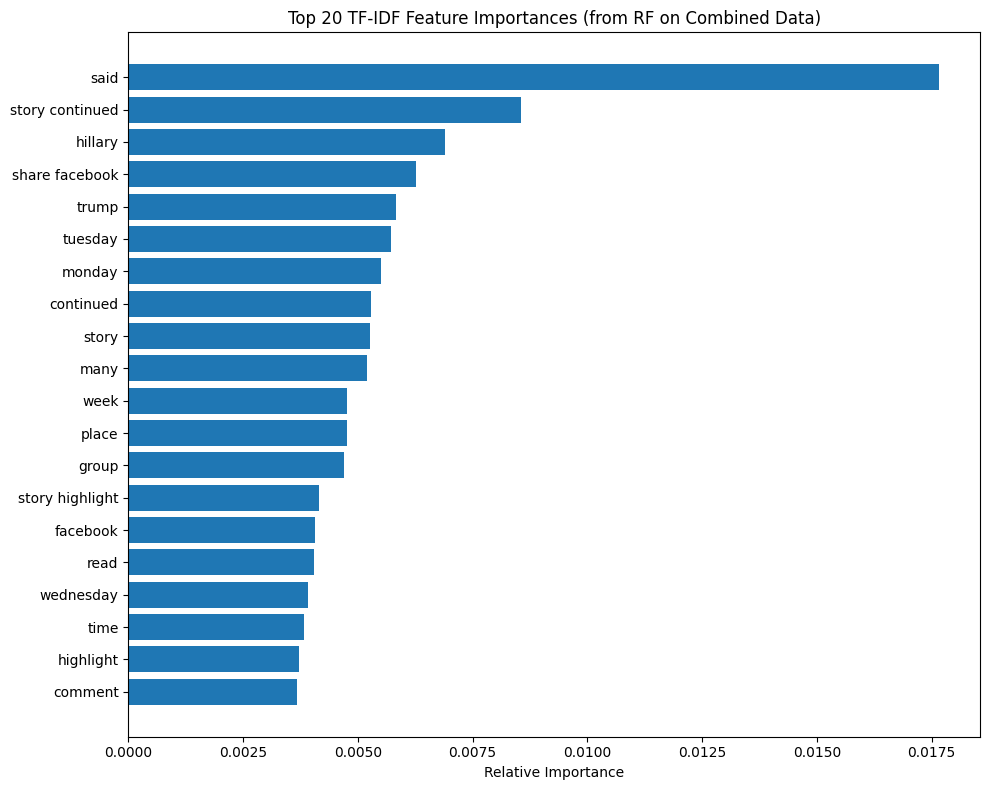

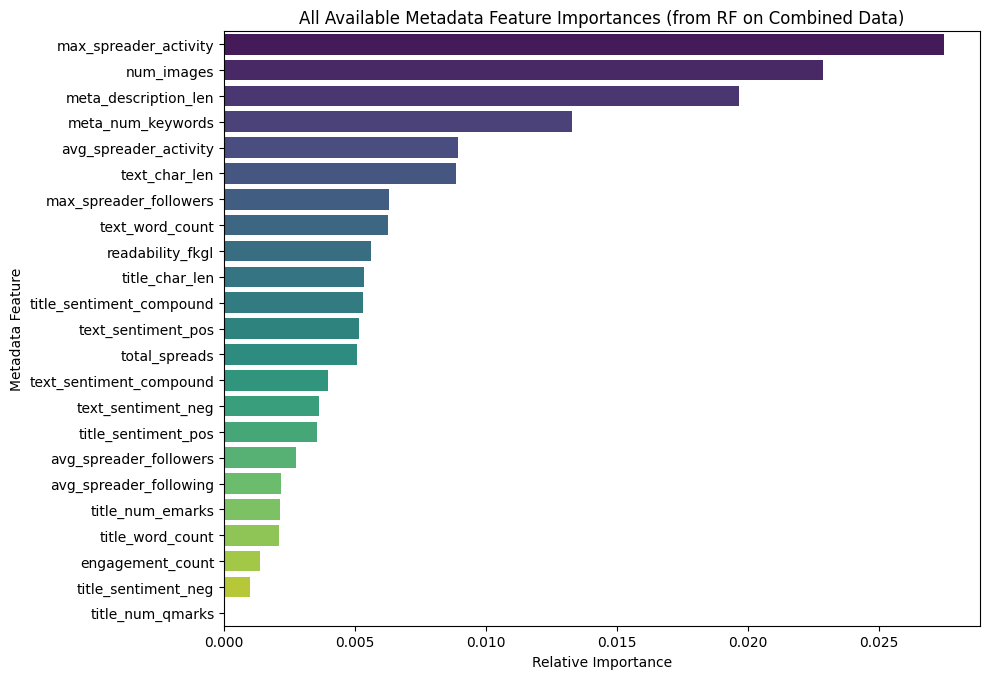


Selected Metadata Features for Modeling: ['max_spreader_activity', 'num_images', 'meta_description_len', 'meta_num_keywords', 'avg_spreader_activity', 'text_char_len', 'max_spreader_followers', 'text_word_count', 'readability_fkgl', 'title_char_len']
Shape of Combined (Content_TFIDF + Selected Metadata_Scaled) features: (182, 5010)

--- 4. Model Training and Evaluation (Focus on Random Forest & F1-Score) ---
Data split for 'Content + Selected Metadata' model.

=== Evaluating Random Forest (Content-Only) ===

--- Training Random Forest (Content-Only) ---

Results for Random Forest (Content-Only):
Accuracy: 0.6304
Macro F1-Score: 0.6289
ROC AUC Score: 0.7240
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.57      0.60        23
           1       0.62      0.70      0.65        23

    accuracy                           0.63        46
   macro avg       0.63      0.63      0.63        46
weighted avg       0.63      0.63      

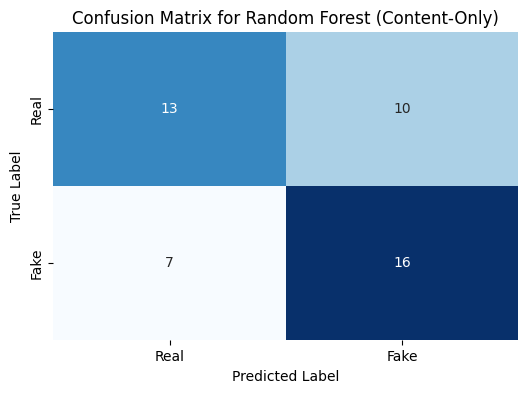


=== Evaluating Random Forest (Content + SELECTED Metadata) ===

--- Training Random Forest (Content + Selected Metadata) ---

Results for Random Forest (Content + Selected Metadata):
Accuracy: 0.7174
Macro F1-Score: 0.7140
ROC AUC Score: 0.7448
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.61      0.68        23
           1       0.68      0.83      0.75        23

    accuracy                           0.72        46
   macro avg       0.73      0.72      0.71        46
weighted avg       0.73      0.72      0.71        46



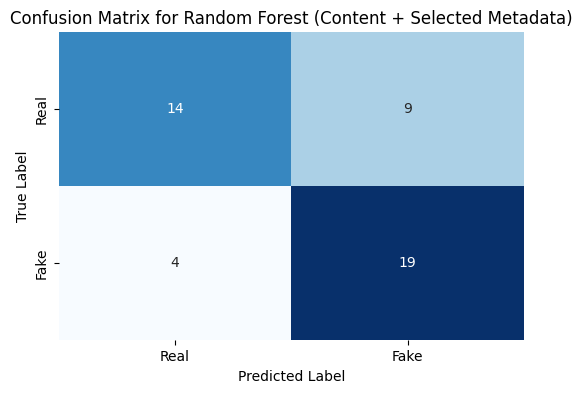


--- 5. Model Performance Summary (F1-Score) ---
                                         model  f1_score  accuracy   roc_auc
1  Random Forest (Content + Selected Metadata)  0.714012  0.717391  0.744802
0                 Random Forest (Content-Only)  0.628856  0.630435  0.724008


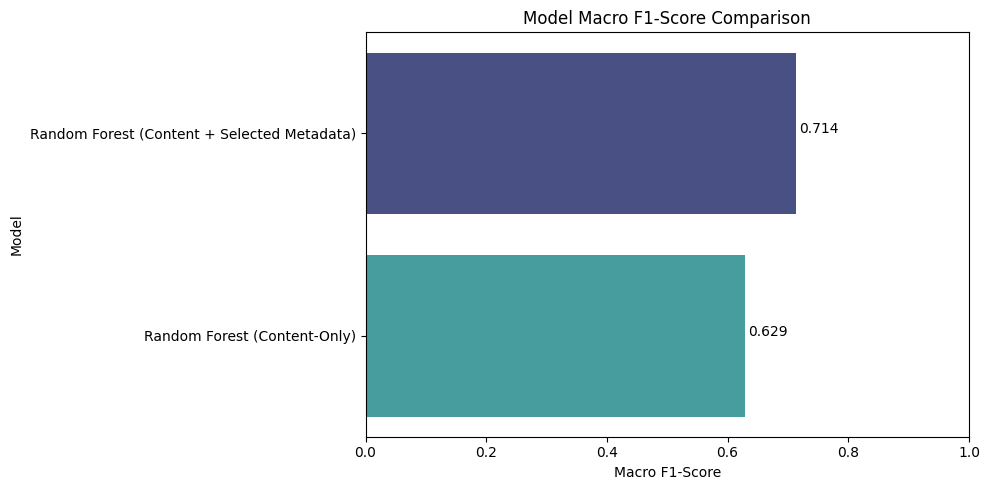


--- Modeling Phase Complete ---


In [10]:
import pandas as pd
import numpy as np

# Text Processing and Feature Extraction
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack # To combine sparse and dense features

# Models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler # For scaling metadata

# Evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure NLTK resources are available
# nltk.download('stopwords', quiet=True)
# nltk.download('punkt', quiet=True)
# nltk.download('wordnet', quiet=True)

print("--- Starting Modeling Phase (Focused on Random Forest, Selected Metadata & F1-Score) ---")

# --- 1. Load or Use Existing Processed DataFrame ---
try:
    if 'news_df_eda' in locals() and isinstance(news_df_eda, pd.DataFrame) and not news_df_eda.empty:
        df_for_modeling = news_df_eda.copy()
        print("Using 'news_df_eda' for modeling.")
    elif 'news_df' in locals() and isinstance(news_df, pd.DataFrame) and not news_df.empty:
        df_for_modeling = news_df.copy()
        print("Using 'news_df' for modeling as 'news_df_eda' was not found or empty.")
    else:
        print("ERROR: No DataFrame ('news_df_eda' or 'news_df') found from EDA. Please run EDA first.")
        df_for_modeling = pd.DataFrame({
            'id': [f'Test_{i}' for i in range(100)], 'title': ['Sample title ' + str(i) for i in range(100)],
            'text': ['Sample text content for article ' + str(i) for i in range(100)],
            'label': np.random.randint(0, 2, 100), 'engagement_count': np.random.randint(0,1000,100),
            'readability_fkgl': np.random.rand(100)*10+5, 'full_processed_text': ['sample processed text ' + str(i) for i in range(100)]
        })
        print("Created a dummy DataFrame for demonstration.")
except NameError:
    print("ERROR: DataFrame ('news_df_eda' or 'news_df') not defined. Please run EDA first.")
    df_for_modeling = pd.DataFrame({
            'id': [f'Test_{i}' for i in range(100)], 'title': ['Sample title ' + str(i) for i in range(100)],
            'text': ['Sample text content for article ' + str(i) for i in range(100)],
            'label': np.random.randint(0, 2, 100), 'engagement_count': np.random.randint(0,1000,100),
            'readability_fkgl': np.random.rand(100)*10+5, 'full_processed_text': ['sample processed text ' + str(i) for i in range(100)]
        })
    print("Created a dummy DataFrame for demonstration due to NameError.")

if not df_for_modeling.empty:
    print(f"\nShape of DataFrame for modeling: {df_for_modeling.shape}")
    if 'label' not in df_for_modeling.columns:
        print("ERROR: 'label' column is missing.")
        exit() # Or handle error appropriately
    if 'full_processed_text' not in df_for_modeling.columns: 
        print("Warning: 'full_processed_text' not found. Creating it now.")
        df_for_modeling['title'] = df_for_modeling['title'].fillna('')
        df_for_modeling['text'] = df_for_modeling['text'].fillna('')
        stop_words = set(stopwords.words('english'))
        lemmatizer = WordNetLemmatizer()
        def preprocess_text_for_modeling(text):
            if pd.isna(text): return ""
            text = str(text)
            tokens = word_tokenize(text.lower())
            processed_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
            return " ".join(processed_tokens)
        df_for_modeling['full_processed_text'] = (df_for_modeling['title'] + " " + df_for_modeling['text']).apply(preprocess_text_for_modeling)


    # --- 2. Text Preprocessing (Assumed done if 'full_processed_text' exists) ---
    print("\n--- 2. Text Preprocessing (Assumed done) ---")

    # --- 3. Feature Engineering (TF-IDF and Metadata) ---
    print("\n--- 3. Feature Engineering ---")
    tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
    X_content_tfidf = tfidf_vectorizer.fit_transform(df_for_modeling['full_processed_text'])
    tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
    print(f"Shape of Content-Only TF-IDF features (X_content_tfidf): {X_content_tfidf.shape}")

    potential_metadata_cols = [ # Keep this list comprehensive from EDA
        'title_char_len', 'text_char_len', 'title_word_count', 'text_word_count',
        'readability_fkgl', 'title_num_qmarks', 'title_num_emarks',
        'title_sentiment_compound', 'title_sentiment_pos', 'title_sentiment_neg',
        'text_sentiment_compound', 'text_sentiment_pos', 'text_sentiment_neg',
        'meta_description_len', 'meta_num_keywords', 'num_images',
        'engagement_count', 'total_spreads', 'avg_spreader_activity', 'max_spreader_activity',
        'avg_spreader_followers', 'max_spreader_followers', 'avg_spreader_following'
    ]
    
    y = df_for_modeling['label']
    
    # --- 3.5 Feature Importance Analysis and Selection ---
    print("\n--- 3.5 Feature Importance Analysis & Selection (Using Random Forest on All Available Metadata) ---")
    
    all_available_metadata_cols = [col for col in potential_metadata_cols if col in df_for_modeling.columns]
    X_metadata_scaled_for_importance = None
    X_combined_for_importance = X_content_tfidf # Default if no metadata
    selected_metadata_cols = [] # Initialize

    if all_available_metadata_cols:
        X_metadata_temp = df_for_modeling[all_available_metadata_cols].copy()
        for col in X_metadata_temp.columns:
            if X_metadata_temp[col].isnull().any():
                X_metadata_temp[col] = X_metadata_temp[col].fillna(X_metadata_temp[col].median())
        scaler_temp = StandardScaler()
        X_metadata_scaled_for_importance = scaler_temp.fit_transform(X_metadata_temp)
        if X_metadata_scaled_for_importance.ndim == 1: X_metadata_scaled_for_importance = X_metadata_scaled_for_importance.reshape(-1, 1)
        X_combined_for_importance = hstack([X_content_tfidf, X_metadata_scaled_for_importance]).tocsr()
        print(f"Shape of features for importance analysis: {X_combined_for_importance.shape}")

        print("Training temporary Random Forest on Combined Features for Importance Analysis...")
        temp_rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced')
        temp_rf_model.fit(X_combined_for_importance, y)
        importances = temp_rf_model.feature_importances_
        
        # TF-IDF Feature Importances
        tfidf_importances_values = importances[:X_content_tfidf.shape[1]]
        tfidf_indices = np.argsort(tfidf_importances_values)[::-1]
        top_n_tfidf = 20
        
        plt.figure(figsize=(10, 8))
        plt.title(f"Top {top_n_tfidf} TF-IDF Feature Importances (from RF on Combined Data)")
        plt.barh(range(top_n_tfidf), tfidf_importances_values[tfidf_indices[:top_n_tfidf]], align='center')
        plt.yticks(range(top_n_tfidf), [tfidf_feature_names[i] for i in tfidf_indices[:top_n_tfidf]])
        plt.gca().invert_yaxis()
        plt.xlabel("Relative Importance")
        plt.tight_layout()
        plt.show()
            
        # Metadata Feature Importances
        metadata_importances_values = importances[X_content_tfidf.shape[1]:]
        if len(metadata_importances_values) == len(all_available_metadata_cols):
            metadata_importance_df = pd.DataFrame({'feature': all_available_metadata_cols, 'importance': metadata_importances_values})
            metadata_importance_df = metadata_importance_df.sort_values(by='importance', ascending=False)
            
            plt.figure(figsize=(10, max(6, len(all_available_metadata_cols)*0.3) ))
            sns.barplot(x='importance', y='feature', data=metadata_importance_df, palette='viridis')
            plt.title("All Available Metadata Feature Importances (from RF on Combined Data)")
            plt.xlabel("Relative Importance"); plt.ylabel("Metadata Feature"); plt.tight_layout(); plt.show()
            
            num_selected_metadata_features = min(10, len(all_available_metadata_cols)) 
            selected_metadata_cols = metadata_importance_df['feature'].head(num_selected_metadata_features).tolist()
        else:
            print("Mismatch in metadata importance calculation. Defaulting to no selected metadata.")
    else:
        print("No metadata columns available for importance analysis.")

    print(f"\nSelected Metadata Features for Modeling: {selected_metadata_cols}")

    # Prepare X_combined_selected_meta_tfidf
    X_metadata_scaled_selected = None
    X_combined_selected_meta_tfidf = None # Initialize to None

    if selected_metadata_cols and all(col in df_for_modeling.columns for col in selected_metadata_cols):
        X_metadata_selected = df_for_modeling[selected_metadata_cols].copy()
        for col in X_metadata_selected.columns:
            if X_metadata_selected[col].isnull().any():
                X_metadata_selected[col] = X_metadata_selected[col].fillna(X_metadata_selected[col].median())
        scaler_selected_meta = StandardScaler() 
        X_metadata_scaled_selected = scaler_selected_meta.fit_transform(X_metadata_selected)
        if X_metadata_scaled_selected.ndim == 1: X_metadata_scaled_selected = X_metadata_scaled_selected.reshape(-1,1)
        X_combined_selected_meta_tfidf = hstack([X_content_tfidf, X_metadata_scaled_selected]).tocsr()
        print(f"Shape of Combined (Content_TFIDF + Selected Metadata_Scaled) features: {X_combined_selected_meta_tfidf.shape}")
    else:
        if not selected_metadata_cols:
            print("No metadata features were selected. 'Content + Selected Metadata' models will not be run, or will be content-only.")
        else:
            print("Not all selected metadata columns are present in df_for_modeling. 'Content + Selected Metadata' models will not be run, or will be content-only.")
        # If no selected metadata, the combined model will effectively be content-only for Random Forest.
        # For clarity, we won't create a separate X_combined_selected_meta_tfidf if it's just X_content_tfidf


    # --- 4. Model Training and Evaluation ---
    print("\n--- 4. Model Training and Evaluation (Focus on Random Forest & F1-Score) ---")
    def train_and_evaluate_model_f1(model, X_train, y_train, X_test, y_test, model_name="Model"):
        print(f"\n--- Training {model_name} ---")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
        
        print(f"\nResults for {model_name}:")
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='macro', zero_division=0) 
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Macro F1-Score: {f1:.4f}")
        
        roc_auc = np.nan
        if y_pred_proba is not None:
            try: roc_auc = roc_auc_score(y_test, y_pred_proba); print(f"ROC AUC Score: {roc_auc:.4f}")
            except ValueError as e: print(f"Could not calculate ROC AUC: {e}")
        else: print("ROC AUC Score: Not available.")
        
        print("Classification Report:")
        print(classification_report(y_test, y_pred, zero_division=0))
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6,4)); sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
        plt.xlabel('Predicted Label'); plt.ylabel('True Label'); plt.title(f'Confusion Matrix for {model_name}'); plt.show()
        return {'model': model_name, 'accuracy': accuracy, 'f1_score': f1, 'roc_auc': roc_auc}

    results_summary = [] 
    
    # Split data for Content-Only models
    X_train_content, X_test_content, y_train_content, y_test_content = train_test_split(
        X_content_tfidf, y, test_size=0.25, random_state=42, stratify=y
    )

    # Split data for Combined Selected Features models
    X_train_combined_selected_meta, X_test_combined_selected_meta, y_train_combined_selected_meta, y_test_combined_selected_meta = (None,)*4
    if X_combined_selected_meta_tfidf is not None and X_combined_selected_meta_tfidf.shape[0] == y.shape[0]:
        X_train_combined_selected_meta, X_test_combined_selected_meta, y_train_combined_selected_meta, y_test_combined_selected_meta = train_test_split(
            X_combined_selected_meta_tfidf, y, test_size=0.25, random_state=42, stratify=y
        )
        print("Data split for 'Content + Selected Metadata' model.")
    else:
        print("'Content + Selected Metadata' features not available for splitting. This model run will be skipped.")


    # --- Random Forest Models ---
    rf_model_instance = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, max_depth=10,class_weight='balanced')

    print("\n=== Evaluating Random Forest (Content-Only) ===")
    res_rf_content = train_and_evaluate_model_f1(
        rf_model_instance, X_train_content, y_train_content, X_test_content, y_test_content, 
        "Random Forest (Content-Only)"
    )
    results_summary.append(res_rf_content)

    if X_combined_selected_meta_tfidf is not None and X_train_combined_selected_meta is not None:
        print("\n=== Evaluating Random Forest (Content + SELECTED Metadata) ===")
        # Need a new instance of the model for a fresh fit
        rf_model_instance_selected_meta = RandomForestClassifier(n_estimators=100, max_depth=10,random_state=42, n_jobs=-1, class_weight='balanced')
        res_rf_selected_meta = train_and_evaluate_model_f1(
            rf_model_instance_selected_meta, X_train_combined_selected_meta, y_train_combined_selected_meta, 
            X_test_combined_selected_meta, y_test_combined_selected_meta, 
            "Random Forest (Content + Selected Metadata)"
        )
        results_summary.append(res_rf_selected_meta)
    else:
        print("\nSkipping Random Forest (Content + Selected Metadata) as selected metadata features are not available.")


    # --- 5. Results Summary (Focus on F1-Score) ---
    print("\n--- 5. Model Performance Summary (F1-Score) ---")
    if results_summary: 
        results_df = pd.DataFrame(results_summary)
        if 'f1_score' in results_df.columns: 
            results_df_sorted = results_df.sort_values(by='f1_score', ascending=False)
            print(results_df_sorted[['model', 'f1_score', 'accuracy', 'roc_auc']]) # Display relevant columns
            if not results_df_sorted.empty:
                plt.figure(figsize=(10, max(5, len(results_df_sorted) * 0.5))) 
                sns.barplot(x='f1_score', y='model', data=results_df_sorted, palette='mako')
                plt.title('Model Macro F1-Score Comparison')
                plt.xlabel('Macro F1-Score'); plt.ylabel('Model'); plt.xlim(0.0, 1.0) 
                for index, row in results_df_sorted.reset_index(drop=True).iterrows():
                    if pd.notna(row['f1_score']): 
                        plt.text(row['f1_score'] + 0.005, index, f"{row['f1_score']:.3f}")
                plt.tight_layout(); plt.show()
        else:
            print("DataFrame 'results_df' was created but 'f1_score' column is missing.")
            print("Contents of results_summary:")
            for item in results_summary: print(item)
    else:
        print("No model results to summarize. 'results_summary' is empty.")

else:
    print("DataFrame for modeling is empty. Cannot proceed with modeling.")
print("\n--- Modeling Phase Complete ---")
